In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00


### We need to sample points from each image present in 100_images_dataset file, in order to generate a point cloud.

In [ ]:
import cv2
import numpy as np
import os

# Load the images
img_path = '/content/drive/MyDrive/100_images_dataset_malaria'
img_files = os.listdir(img_path)

# Sample points from each image
points = []
for img_file in img_files:
    img = cv2.imread(os.path.join(img_path, img_file))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        for point in contour:
            x, y = point[0]
            points.append([x, y])

# Convert the points to a numpy array
points = np.array(points)

# Print the point cloud
print(points)


[[164 255]
 [167 255]
 [  0 252]
 ...
 [141   1]
 [140   1]
 [139   0]]


In [ ]:
# Step 6: Load the Labels
labels_path = '/content/drive/MyDrive/bounding_box'
red_bboxes = []
blue_bboxes = []
for img_file in img_files:
    red_boxes_file = os.path.join(labels_path, img_file[:-4] + '_red.npy')
    blue_boxes_file = os.path.join(labels_path, img_file[:-4] + '_blue.npy')
    red_bboxes.append(np.load(red_boxes_file))
    blue_bboxes.append(np.load(blue_boxes_file))

print("Bounding box labels loaded successfully!")

Bounding box labels loaded successfully!


In [ ]:
blue_bboxes[0]

array([['241', '235', '15', '11', 'blue'],
       ['228', '179', '28', '49', 'blue'],
       ['0', '174', '62', '82', 'blue'],
       ['0', '107', '27', '53', 'blue'],
       ['124', '98', '57', '46', 'blue'],
       ['195', '9', '49', '51', 'blue'],
       ['239', '0', '17', '24', 'blue'],
       ['0', '0', '13', '29', 'blue']], dtype='<U21')

In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ip

In [ ]:
import cv2
import numpy as np
import open3d as o3d

# Load the image
img = cv2.imread('/content/drive/MyDrive/100_images_dataset_malaria/image-1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Convert the image to an RGB-D image
depth = o3d.geometry.Image(np.array(thresh))
color = o3d.geometry.Image(np.array(img))
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth)

# Load the camera intrinsic parameters
intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width=img.shape[1], height=img.shape[0], fx=500, fy=500, cx=img.shape[1]/2, cy=img.shape[0]/2)

# Convert the RGB-D image to a point cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, intrinsic)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])


[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
import open3d as o3d

# Load the point cloud
pcd = o3d.io.read_point_cloud('point_cloud.pcd')

# Create a visualizer
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)

# Update the geometry
vis.update_geometry(pcd)

# Render the visualization
vis.poll_events()
vis.update_renderer()


[Open3D WARNING] Read PCD failed: unable to open file: point_cloud.pcd
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [ ]:
import cv2
import open3d as o3d

# Load the image
img = cv2.imread('/content/drive/MyDrive/100_images_dataset_malaria/image-1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Convert the image to a point cloud
pcd = o3d.geometry.PointCloud.create_from_depth_image(
    o3d.geometry.Image(thresh))

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])


In [ ]:
print(points.size)

276232


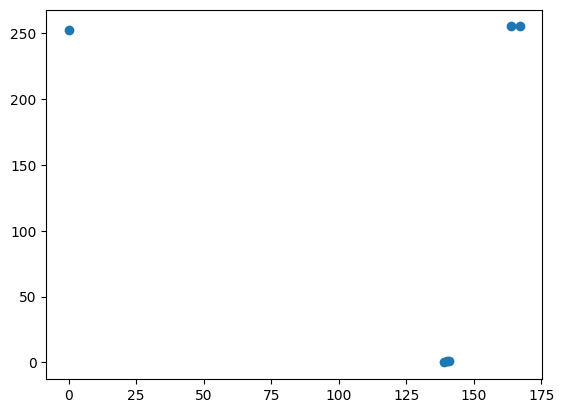

In [ ]:
import matplotlib.pyplot as plt

# Load the point cloud
points = np.array([[164, 255], [167, 255], [0, 252], [141, 1], [140, 1], [139, 0]])

# Plot the point cloud
plt.scatter(points[:, 0], points[:, 1])
plt.show()


In [ ]:
!pip install --upgrade tf_slim

In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.5
    Uninstalling widgetsnbextension-3.6.5:
      Successfully uninstalled widgetsnbextension-3.6.5
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3

###Cloning the Point GNN Repo

In [ ]:
%cd /content/drive/MyDrive/Point-GNN

/content/drive/MyDrive/Point-GNN


In [ ]:
!git clone https://github.com/WeijingShi/Point-GNN.git

fatal: destination path 'Point-GNN' already exists and is not an empty directory.


In [ ]:
#Data label file
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
#Calib file
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_calib.zip
#Velodyne file
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_velodyne.zip
# Image file
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip

--2023-09-07 10:02:53--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.47.151, 52.219.47.71, 52.219.47.203, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.47.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12569945557 (12G) [application/zip]
Saving to: ‘data_object_image_2.zip’

data_object_image_2   9%[>                   ]   1.11G  28.8MB/s    eta 6m 28s ^C
--2023-09-07 10:03:35--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.211, 52.219.169.29, 52.219.170.177, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.72.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26854811 (26M) [application/zip]
Saving to: ‘data_object_calib.zip’

data_ob

In [ ]:
#Unzip the velodyne training folder
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_velodyne.zip 'training/*' -d /content/drive/MyDrive/Voxelnet/crop_data

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/005104.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/004650.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/005744.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/004314.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/006002.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/006909.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/004696.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/000265.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/000142.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/003924.bin  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/velodyne/001879.bin  
 ex

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_label_2.zip 'training/*' -d /content/drive/MyDrive/Voxelnet/crop_data

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/001705.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/000367.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/006048.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/005468.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/007308.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/001417.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/006638.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/002132.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/002407.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/007186.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/label_2/004363.txt  
 extracting: /

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_calib.zip 'training/*' -d /content/drive/MyDrive/Voxelnet/crop_data

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/001705.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/000367.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/006048.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/005468.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/007308.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/001417.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/006638.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/002132.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/002407.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/007186.txt  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/calib/004363.txt  
 extracting: /content/drive/MyDrive/

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_image_2.zip 'training/*' -d /content/drive/MyDrive/Voxelnet/crop_data

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/005321.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/001233.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/005951.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/005044.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/004166.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/004553.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/001976.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/001218.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/000819.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/002842.png  
 extracting: /content/drive/MyDrive/Voxelnet/crop_data/training/image_2/000643.png  
 extracting: /

In [ ]:
%cd Point-GNN

[Errno 2] No such file or directory: 'Point-GNN'
/content/drive/MyDrive/Point-GNN


In [ ]:
!ls

checkpoints  eval.py		      LICENSE  README.md  splits    velodyne
configs      image		      models   run.py	  train.py
dataset      kitti_native_evaluation  Outputs  scripts	  util


In [ ]:
!python run.py

2023-09-17 13:56:32.428353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 13:56:33.939060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: run.py
       [-h]
       [-l LEVEL]
       [--test]
       [--no-box-merge]
       [--no-box-score]
       [--dataset_root_dir DATASET_ROOT_DIR]
       [--dataset_split_file DATASET_SPLIT_FILE]
       [--output_dir OUTPUT_DIR]
       checkpoint_path
run.py: error: the following arguments are required: checkpoint_path


In [ ]:
!pip install tensorflow

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_calib.zip -d /content/drive/MyDrive/Point-GNN/dataset/calib


Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/004249.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/001148.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/002994.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/002335.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/000689.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/002782.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/004242.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/003661.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/003118.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/005423.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib/00462

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_image_2.zip -d /content/drive/MyDrive/Point-GNN/dataset/image

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/004818.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/003183.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/007384.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/002195.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/002058.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/006043.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/006951.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/002983.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/007502.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2/007116.png  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/image

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_label_2.zip -d /content/drive/MyDrive/Point-GNN/dataset/labels

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/001705.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/000367.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/006048.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/005468.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/007308.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/001417.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/006638.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/002132.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/002407.txt  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2/007186.txt  
 extracting: /content/drive/MyDrive/Poi

In [ ]:
!python3 /content/drive/MyDrive/Point-GNN/run.py /content/drive/MyDrive/Point-GNN/checkpoints/car_auto_T3_train --dataset_root_dir /content/drive/MyDrive/Point-GNN/dataset --output_dir /content/drive/MyDrive/Point-GNN/Outputs

2023-09-18 15:10:28.169353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 15:10:30.183943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/drive/MyDrive/Point-GNN/run.py", line 117, in <module>
    t_initial_vertex_features = tf.compat.v1.placeholder(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/array_ops.py", line 3169, in placeholder
    raise RuntimeError("tf.placeholder() is not compatible with "
RuntimeError: tf.placeholder() is not compatible with eager execution.


In [ ]:
!python eval.py configs/car_auto_T3_train_eval_config

2023-09-18 14:31:27.407549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 14:31:28.456017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/drive/MyDrive/Point-GNN/eval.py", line 45, in <module>
    dataset = KittiDataset(
  File "/content/drive/MyDrive/Point-GNN/dataset/kitti_dataset.py", line 208, in __init__
    self._verify_file_list(
  File "/content/drive/MyDrive/Point-GNN/dataset/kitti_dataset.py", line 427, in _verify_file_list
    assert isfile(point_file), "Point %s does not exist" % point_file
AssertionError: Point /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/000065.bin does not exist


In [ ]:
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/image/training/image_2
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/image/testing/image_2
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/velodyne/testing/velodyne
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/calib/training/calib
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/calib/testing/calib
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/labels/training/label_2
!mkdir -p /content/drive/MyDrive/Point-GNN/dataset/3DOP_splits


In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_velodyne.zip -d /content/drive/MyDrive/Point-GNN/dataset/velodyne

Archive:  /content/drive/MyDrive/Voxelnet/crop_data/data_object_velodyne.zip
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/005357.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/005575.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/000843.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/006659.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/004249.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/002915.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/002812.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/005851.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velodyne/004836.bin  
 extracting: /content/drive/MyDrive/Point-GNN/dataset/velodyne/training/velod

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_label_2.zip -d /content/Point-GNN/dataset/labels

Streaming output truncated to the last 5000 lines.
 extracting: /content/Point-GNN/dataset/labels/training/label_2/001705.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/000367.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/006048.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/005468.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/007308.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/001417.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/006638.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/002132.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/002407.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/007186.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/004363.txt  
 extracting: /content/Point-GNN/dataset/labels/training/label_2/005764.txt  
 extracting: /content/Poi

In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_calib.zip -d /content/Point-GNN/dataset/calib

Streaming output truncated to the last 5000 lines.
 extracting: /content/Point-GNN/dataset/calib/testing/calib/004249.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/001148.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/002994.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/002335.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/000689.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/002782.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/004242.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/003661.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/003118.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/005423.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/004621.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/004649.txt  
 extracting: /content/Point-GNN/dataset/calib/testing/calib/004048.txt  


In [ ]:
!unzip /content/drive/MyDrive/Voxelnet/crop_data/data_object_image_2.zip -d /content/Point-GNN/dataset/image

Streaming output truncated to the last 5000 lines.
 extracting: /content/Point-GNN/dataset/image/testing/image_2/004818.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/003183.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/007384.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/002195.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/002058.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/006043.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/006951.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/002983.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/007502.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/007116.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/006136.png  
 extracting: /content/Point-GNN/dataset/image/testing/image_2/006982.png  
 extracting: /content/Point-GNN/dataset/image/tes

In [ ]:
!mkdir -p /content/Point-GNN/dataset/3DOP_splits

In [ ]:
python3 run.py checkpoints/car_auto_T3_train/ --dataset_root_dir DATASET_ROOT_DIR --output_dir DIR_TO_SAVE_RESULTS